<a href="https://colab.research.google.com/github/jgkorman/Python-Projects/blob/main/State_Capture_and_Civil_Society_Strength_Overtime_in_Latin_America_2000_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install researchpy
import seaborn as sns
import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
fname = "/content/drive/MyDrive/PhD Long Paper/Papers Manuscripts/Wealth Inequality, Regime Type, & State Capture/Copy of state_capture_database_updated.csv"
sc = pd.read_csv(fname)
sc.head(5)

,Unnamed: 0,ID,country,year_x,wgi_VoiceAndAccountability,wgi_PoliticalStability_Violence,wgi_GovernmentEffectiveness,wgi_RegulatoryQuality,wgi_ControlOfCorruption_Trasnformed_Final,wgi_ControlofCorruption_Transformed,...,e_civil_war,e_pt_coup,PopDV,YearsPOP,WID_Top_1_Percent_Share_Income_Inequality,WID_Top_10_Percent_Share_Income_Inequality,WID_Bottom_50_Percent_Share_Income_Inequality,WID_Top_1_Percent_Share_Wealth_Inequality,WID_Top_10_Percent_Share_Wealth_Inequality,WID_Bottom_50_Percent_Share_Wealth_Inequality
0,0,1,Argentina,1996,0.391903,0.112986,0.165690,0.518067,2.601317,0.101317,...,0.0,0,0.0,0.0,0.1295,0.4525,0.1449,0.3154,0.6387,0.0394
1,1,1,Argentina,1997,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.0,0,0.0,0.0,0.1119,0.4525,0.1449,0.3195,0.6408,0.0392
2,2,1,Argentina,1998,0.308850,-0.131970,0.376485,0.570877,2.613424,0.113424,...,0.0,0,0.0,0.0,0.1135,0.4525,0.1449,0.3146,0.6382,0.0395
3,3,1,Argentina,1999,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.0,0,0.0,0.0,0.1222,0.4525,0.1449,0.3136,0.6377,0.0396
4,4,1,Argentina,2000,0.418347,0.099359,0.032177,0.257245,2.692119,0.192119,...,0.0,0,0.0,0.0,0.1295,0.4525,0.1449,0.3064,0.6339,0.0400


In [3]:
sc_new = sc[(sc['year_x'] >= 2000) & (sc['year_x'] <= 2017)]
sc_new

,Unnamed: 0,ID,country,year_x,wgi_VoiceAndAccountability,wgi_PoliticalStability_Violence,wgi_GovernmentEffectiveness,wgi_RegulatoryQuality,wgi_ControlOfCorruption_Trasnformed_Final,wgi_ControlofCorruption_Transformed,...,e_civil_war,e_pt_coup,PopDV,YearsPOP,WID_Top_1_Percent_Share_Income_Inequality,WID_Top_10_Percent_Share_Income_Inequality,WID_Bottom_50_Percent_Share_Income_Inequality,WID_Top_1_Percent_Share_Wealth_Inequality,WID_Top_10_Percent_Share_Wealth_Inequality,WID_Bottom_50_Percent_Share_Wealth_Inequality
4,4,1,Argentina,2000,0.418347,0.099359,0.032177,0.257245,2.692119,0.192119,...,0.0,0,0.0,0.0,0.1295,0.4525,0.1449,0.3064,0.6339,0.0400
5,5,1,Argentina,2001,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.0,0,0.0,0.0,0.1293,0.4585,0.1343,0.2822,0.6118,0.0441
6,6,1,Argentina,2002,0.260063,-0.779415,-0.280357,-0.919025,2.968211,0.468211,...,0.0,0,0.0,0.0,0.1337,0.4557,0.1351,0.2941,0.6280,0.0405
7,7,1,Argentina,2003,0.349125,-0.358941,-0.047438,-0.708926,2.978336,0.478336,...,0.0,0,1.0,1.0,0.1314,0.4414,0.1497,0.3101,0.6426,0.0373
8,8,1,Argentina,2004,0.362041,-0.609956,-0.057569,-0.713760,2.924991,0.424991,...,0.0,0,1.0,2.0,0.1291,0.4271,0.1643,0.3122,0.6453,0.0366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,485,19,Venezuela,2013,-0.951577,-1.077632,-1.167550,-1.630421,3.813794,1.313794,...,NaN,0,1.0,15.0,0.2131,0.5321,0.1168,0.3283,0.6584,0.0337
486,486,19,Venezuela,2014,-1.083765,-0.852002,-1.227362,-1.815137,3.899611,1.399611,...,NaN,0,1.0,16.0,0.2189,0.5319,0.1169,0.3208,0.6503,0.0359
487,487,19,Venezuela,2015,-1.091086,-0.977181,-1.220135,-1.884915,3.891556,1.391556,...,NaN,0,1.0,17.0,0.2176,0.5315,0.1181,0.3147,0.6458,0.0367
488,488,19,Venezuela,2016,-1.135475,-1.024604,-1.285760,-1.996754,3.853657,1.353657,...,NaN,0,1.0,18.0,0.2202,0.5271,0.1204,0.3056,0.6378,0.0385


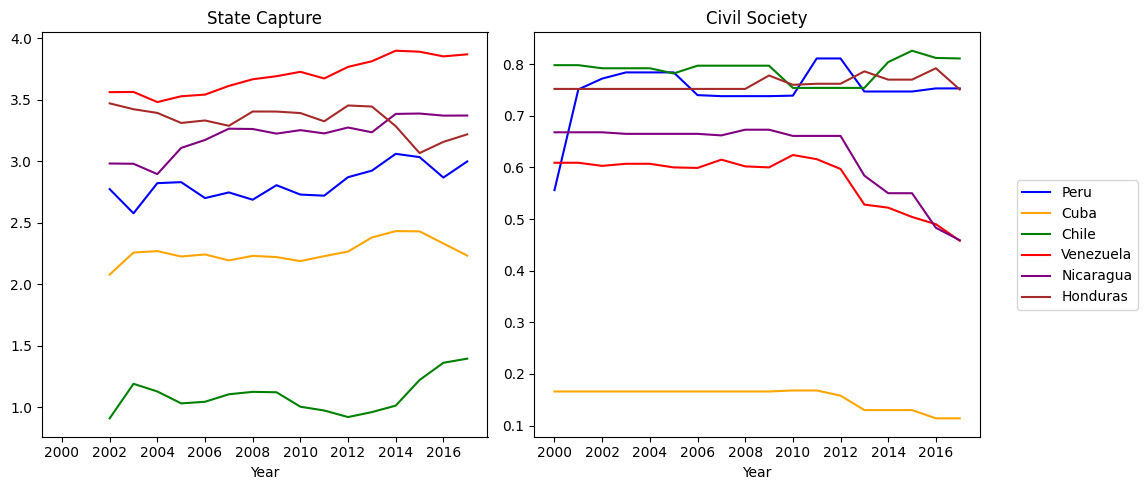

In [4]:
import matplotlib.pyplot as plt

# Create a list of the countries to plot
countries_to_plot = ["Peru", "Cuba", "Chile", "Venezuela", "Nicaragua", "Honduras"]

# Create a dictionary to map the countries to colors
color_mapping = {
    "Peru": "blue",
    "Cuba": "orange",
    "Chile": "green",
    "Venezuela": "red",
    "Nicaragua": "purple",
    "Honduras": "Brown",
}

# Create a new figure and two sets of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the state capture indicator on the first axis
for country in countries_to_plot:
    country_data = sc_new[sc_new["country"] == country]
    ax1.plot(country_data["year_x"], country_data["wgi_ControlOfCorruption_Trasnformed_Final"], color=color_mapping[country], label=country)

# Add a title and labels to the first plot
ax1.set_title("State Capture")
ax1.set_xlabel("Year")
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Plot the V-Dem civil society strength indicator on the second axis
for country in countries_to_plot:
    country_data = sc_new[sc_new["country"] == country]
    ax2.plot(country_data["year_x"], country_data["v2x_cspart"], color=color_mapping[country], label=country)

# Add a title and labels to the second plot
ax2.set_title("Civil Society")
ax2.set_xlabel("Year")
ax2.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Create a single legend and place it to the right of the overall figure
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.15, 0.5))

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
